# tensorflow v2.xx에서 v1 사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() #tensorflow v2 비활성화하고 v1 활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## tensorflow
 - 데이터 흐름 그래프 (tensor 객체의 흐름)을 사용하는 수치 계산 라이브러리
 - 그래프는 node(연산)과 edge로 구성
 - sess = tf.Sessio()을 이용해서 실행환경
 - sess.run()을 통해서 실행 결과를 확인

In [2]:
#1단계 : tensor 정의
node1 = tf.constant ('Hello, Tensorflow')

#2단계 : 세션(연산을 실행하는 환경) 생성
sess = tf.Session()
print(node1)

#3단계 : 실제 실행 및 출력
print(sess.run(node1))
print(sess.run(node1).decode())

Tensor("Const:0", shape=(), dtype=string)
b'Hello, Tensorflow'
Hello, Tensorflow


In [3]:
#간단한 연산  tensor graph
#1. 그래프 정의
node1 = tf.constant(10,dtype=tf.float16)
node2 = tf.constant(20,dtype=tf.float16)
node3 = tf.add(node1, node2)

#2. 세션 생성
sess = tf.Session()

#3. 세션 실행 & 결과
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [4]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run([node1, node2]))

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]


In [5]:
#평균값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
print(sess.run(m))

2.5


In [6]:
# tf.random_normal([size]) : 평균이 0이고 표준편차가 1인 난수 size개 발생
w = tf.random_normal([3]) 
sess = tf.Session()
sess.run(w)

array([-0.3244376 ,  0.176525  , -0.58186615], dtype=float32)

In [7]:
# 변수노드
w = tf.Variable(tf.random_normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(w)

array([-2.6415422], dtype=float32)

# Tensorflow v1을 이용한 회귀분석 구현

## 독립변수 x가 1개, 타겟(종속)변수 y 가 1개

In [8]:
# define tensor graph

#dataset 확보
x = np.array([1,2,3])
y = np.array([2,3,4])

# weight와 bias
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

#Hat, Hypothesis : 결과는 numpy 배열
H = W*x+b

#cost function : 손실함수 :mse
cost = tf.reduce_mean(tf.square(H-y))

'''
학습목적 : cost가 최소가 되는 W,b를 찾는 것
cost 함수는 2차 함수이므로, 곡선그래프, 곡선위 미분값이 0이 되는 방향
(경사하강법 Gradient Descent)
'''

optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.01)
train = optimizer.minimize(cost)

#세션 생성
sess = tf.Session()

#W,b 초기화
sess.run(tf.global_variables_initializer())

#6000번 학습 (v2에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300==0:
        print("{}번째 cost: {}, w:{}, b:{}".format(step,cost_val,W_val, b_val))

0번째 cost: 18.29680633544922, w:[-0.16947745], b:[-0.3441313]
300번째 cost: 0.016436470672488213, w:[1.148544], b:[0.6623247]
600번째 cost: 0.0038783333729952574, w:[1.0721561], b:[0.83597213]
900번째 cost: 0.0009151199483312666, w:[1.0350502], b:[0.9203228]
1200번째 cost: 0.00021592869597952813, w:[1.0170257], b:[0.9612965]
1500번째 cost: 5.095020969747566e-05, w:[1.0082704], b:[0.98119956]
1800번째 cost: 1.2022504961350933e-05, w:[1.0040175], b:[0.99086744]
2100번째 cost: 2.837198053384782e-06, w:[1.0019517], b:[0.9955634]
2400번째 cost: 6.701605457237747e-07, w:[1.0009487], b:[0.997844]
2700번째 cost: 1.585862605679722e-07, w:[1.0004615], b:[0.99895126]
3000번째 cost: 3.764013456475368e-08, w:[1.0002247], b:[0.999489]
3300번째 cost: 8.987128374826625e-09, w:[1.0001101], b:[0.99975044]
3600번째 cost: 2.1818162831976906e-09, w:[1.0000545], b:[0.99987715]
3900번째 cost: 5.040353134866393e-10, w:[1.000026], b:[0.99994075]
4200번째 cost: 1.440447761069663e-10, w:[1.0000142], b:[0.9999684]
4500번째 cost: 5.328478283606

In [9]:
# 최종적으로 나온 회귀식 H = W*x + b
W_,b_ = sess.run([W,b])
W_,b_

(array([1.0000087], dtype=float32), array([0.9999811], dtype=float32))

In [10]:
def predict(x):
    return W_[0] * x+b_[0]

In [11]:
predict(5)

6.000024616718292

## predict을 위한 placeholder 이용
 - placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [12]:
x = tf.placeholder(dtype=tf.float32)
H = 1*x +1

sess = tf.Session()
sess.run([x, H], feed_dict={x : np.array([40,50])})

[array([40., 50.], dtype=float32), array([41., 51.], dtype=float32)]

In [13]:
# tensor 그래프 정의
# 데이터 셋 확보
x_data = np.array([1,2,3])
y_data = np.array([2,3,4])
# placeholder 설정(x, y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight와 bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hat, Hypothesis : 결과는 numpy 배열
H = W * x + b
# cost function (손실함수 : mse )
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 0이 되는 방향
(경사하강법GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# W, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2 에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data,
                                                   y:y_data})
    if step%300==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

0번째 cost:24.86946678161621, W:[-0.5378691], b:[-0.17708233]
300번째 cost:0.005983082577586174, W:[1.0896215], b:[0.79626906]
600번째 cost:0.0014117624377831817, W:[1.0435343], b:[0.9010364]
900번째 cost:0.00033312244340777397, W:[1.0211473], b:[0.9519274]
1200번째 cost:7.860251207603142e-05, W:[1.0102723], b:[0.9766485]
1500번째 cost:1.8546772480476648e-05, W:[1.0049899], b:[0.988657]
1800번째 cost:4.376559445518069e-06, W:[1.0024239], b:[0.9944901]
2100번째 cost:1.0331920066164457e-06, W:[1.0011778], b:[0.99732286]
2400번째 cost:2.442149309445085e-07, W:[1.0005727], b:[0.9986982]
2700번째 cost:5.791825685719232e-08, W:[1.0002787], b:[0.99936604]
3000번째 cost:1.3786575436824933e-08, W:[1.0001359], b:[0.99969053]
3300번째 cost:3.312019769552421e-09, W:[1.0000668], b:[0.99984866]
3600번째 cost:7.977216109900098e-10, W:[1.0000324], b:[0.99992573]
3900번째 cost:1.9684875951497816e-10, W:[1.0000165], b:[0.9999631]
4200번째 cost:5.3589133131026756e-11, W:[1.0000088], b:[0.99998087]
4500번째 cost:5.195962063386794e-11, W

In [14]:
#예측하기
sess.run(H, feed_dict={x:5})

array([6.0000243], dtype=float32)

## scale이 다른 데이터들의 회귀분석 구현(scale 조정 x)

In [15]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

#placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

#Hypothesis
H = W * x + b

# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cost)

#Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range (1, 6001):
    _, cost_val = sess.run([train, cost],feed_dict={x:x_data, y:y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step+1, cost_val))

301/6000번째 cost:110.53304290771484
601/6000번째 cost:79.50658416748047
901/6000번째 cost:79.2371597290039
1201/6000번째 cost:79.23155212402344
1501/6000번째 cost:79.22826385498047
1801/6000번째 cost:79.22514343261719
2101/6000번째 cost:79.22217559814453
2401/6000번째 cost:79.21923065185547
2701/6000번째 cost:79.21646881103516
3001/6000번째 cost:79.21377563476562
3301/6000번째 cost:79.21117401123047
3601/6000번째 cost:79.20865631103516
3901/6000번째 cost:79.20622253417969
4201/6000번째 cost:79.20388793945312
4501/6000번째 cost:79.20162200927734
4801/6000번째 cost:79.19943237304688
5101/6000번째 cost:79.19734191894531
5401/6000번째 cost:79.19529724121094
5701/6000번째 cost:79.19334411621094
6001/6000번째 cost:79.1914291381836


## scale이 다른 데이터들의 회귀분석 구현 (sscale 조정 o)
### scale 조정방법:  모든 데이터를 일정 범위 내로 조정

 - normalization (정규화) : 모든 데이터를 0-1 사이로 조정
 
                        x - x_min
    normalization = ----------------
                      x_max - x_min
                      
    * 위의 식을 써도 되지만 라이브러리(MinMaxScaler)을 주로 씀
    *위의 식보다 라이브러리 추천(sklearn.preprocessing.MinMaxScaler)

 - standardization (표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
 
                        x - x_mean
    standardization = ----------------
                        xstd(표준편차)
         *위의 식보다 라이브러리 추천(sklearn.preprocessing.StandardScaler)

In [16]:

# 라이브러리 쓰지 않고 정규화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# x_data.min(), x_data.max(), x_data.mean(), x_data.std()
norm_scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
norm_scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())

In [17]:
# 라이브러리를 사용하여 정규화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # 독립변수 x를 정규화시킬 객체
scaler_x.fit(x_data)
norm_scaled_x_data = scaler_x.transform(x_data)
scaler_y = MinMaxScaler() # 종속(타겟)변수 y를 정규화시킬 객체
norm_scaled_y_data = scaler_y.fit_transform(y_data)
norm_scaled_y_data

array([[0.        ],
       [0.11111111],
       [0.7       ],
       [0.83333333],
       [1.        ]])

In [18]:
#라이브러리 쓰지 않고 표준화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])

stan_scaled_x_data = (x_data - x_data.mean()) / x_data.std()
stan_scaled_y_data = (y_data - y_data.mean()) / y_data.std()

np.column_stack([x_data, norm_scaled_x_data, stan_scaled_x_data])

array([[ 1.        ,  0.        , -1.22474487],
       [ 2.        ,  0.11111111, -0.93313895],
       [ 5.        ,  0.44444444, -0.05832118],
       [ 8.        ,  0.77777778,  0.81649658],
       [10.        ,  1.        ,  1.39970842]])

In [19]:
np.column_stack([y_data, norm_scaled_y_data, stan_scaled_y_data])

array([[ 5.        ,  0.        , -1.32373476],
       [15.        ,  0.11111111, -1.04563922],
       [68.        ,  0.7       ,  0.42826713],
       [80.        ,  0.83333333,  0.76198177],
       [95.        ,  1.        ,  1.17912508]])

In [20]:
#라이브러리를 사용하여 표준화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
stan_scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
stan_scaled_y_data = scaler_y.fit_transform(y_data)

np.column_stack([y_data, norm_scaled_y_data, stan_scaled_y_data])

array([[ 5.        ,  0.        , -1.32373476],
       [15.        ,  0.11111111, -1.04563922],
       [68.        ,  0.7       ,  0.42826713],
       [80.        ,  0.83333333,  0.76198177],
       [95.        ,  1.        ,  1.17912508]])

In [21]:
# 스케일_조정된 데이터를 다시 복구 :inverse_transform() 이용
scaler_y.inverse_transform(stan_scaled_y_data)

array([[ 5.],
       [15.],
       [68.],
       [80.],
       [95.]])

In [22]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

#placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

#Hypothesis
H = W * x + b

# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

#Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range (1, 6001):
    _, cost_val = sess.run([train, cost],feed_dict={x:norm_scaled_x_data,
                                                    y:norm_scaled_y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step, cost_val))

300/6000번째 cost:0.07692434638738632
600/6000번째 cost:0.06209052726626396
900/6000번째 cost:0.05390658229589462
1200/6000번째 cost:0.04784484952688217
1500/6000번째 cost:0.042809851467609406
1800/6000번째 cost:0.03848446160554886
2100/6000번째 cost:0.03473511338233948
2400/6000번째 cost:0.03147746995091438
2700/6000번째 cost:0.028645474463701248
3000/6000번째 cost:0.026183035224676132
3300/6000번째 cost:0.024041902273893356
3600/6000번째 cost:0.02218009904026985
3900/6000번째 cost:0.020561177283525467
4200/6000번째 cost:0.019153427332639694
4500/6000번째 cost:0.017929324880242348
4800/6000번째 cost:0.01686493493616581
5100/6000번째 cost:0.015939388424158096
5400/6000번째 cost:0.015134577639400959
5700/6000번째 cost:0.014434772543609142
6000/6000번째 cost:0.013826240785419941


# 독립변수 x가 3개 타겟(종속)변수 y가 3개

In [64]:
#data set
X_data = np.array([[73, 80, 75],   # 학습시에는 X에 5행3열. 예측시에는 ?행 3열
                  [93, 88, 93],
                  [89, 91, 90],
                  [96,98,100],
                  [73, 66, 70]])

Y_data = np.array([[152], # 학습시에는 y에 5행 1열, 예측시 ?행 1열
                  [185],
                  [180],
                  [196],
                  [142]])

X = tf.placeholder(shape=[None,3], dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

sess = tf.Session()
#sess.run(X, feed_dict = {X:X_data[0:1, ]})
# weeight & bias (weight은 3개, bias는 1개개, bias는 1개)
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))

#hypothesis

#H = X @ W + b #행렬곱
H = tf.matmul(X,W) +b

#cost: mse lose function 사용
cost = tf.reduce_mean(tf.square(H - Y))

#optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

#session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(1,200001):
    _,cost_val = sess.run([train, cost], feed_dict={X: X_data,
                                                   Y:Y_data})
    if step%10000 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 299877.9375
10001번째 cost : 0.2789939045906067
20001번째 cost : 0.2157398909330368
30001번째 cost : 0.18213173747062683
40001번째 cost : 0.16144977509975433
50001번째 cost : 0.1487092673778534
60001번째 cost : 0.1408499777317047
70001번째 cost : 0.13601143658161163
80001번째 cost : 0.13300707936286926
90001번째 cost : 0.13114593923091888
100001번째 cost : 0.13000386953353882
110001번째 cost : 0.12928497791290283
120001번째 cost : 0.1288316398859024
130001번째 cost : 0.1285327672958374
140001번째 cost : 0.12833048403263092
150001번째 cost : 0.1282004415988922
160001번째 cost : 0.1281007081270218
170001번째 cost : 0.12802079319953918
180001번째 cost : 0.12796001136302948
190001번째 cost : 0.1279061734676361
최종 cost : 0.12786202132701874


In [66]:
#예측 
input_data = np.array([[73, 80, 77],
                       [73, 80, 72]])

sess.run(H,feed_dict={X:input_data})

array([[152.72427],
       [149.93172]], dtype=float32)

In [68]:
input_data = np.array([[73, 80, 77]])
sess.run(H,feed_dict={X:input_data})

array([[152.72427]], dtype=float32)

In [77]:
#스케일 조정 후 학습하고 예측하기
from sklearn.preprocessing import StandardScaler
X_data = np.array([[73, 80, 75],   # 학습시에는 X에 5행3열. 예측시에는 ?행 3열
                  [93, 88, 93],
                  [89, 91, 90],
                  [96,98,100],
                  [73, 66, 70]])

Y_data = np.array([[152], # 학습시에는 y에 5행 1열, 예측시 ?행 1열
                  [185],
                  [180],
                  [196],
                  [142]])

scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x_data = scaler_x.fit_transform(X_data)
scaled_y_data = scaler_y.fit_transform(Y_data)
np.column_stack([scaled_x_data, scaled_y_data])

array([[-1.19344226, -0.42020085, -0.93897274, -0.92622337],
       [ 0.82934123,  0.31058324,  0.65550927,  0.68248038],
       [ 0.42478453,  0.58462728,  0.38976227,  0.43873739],
       [ 1.13275875,  1.22406336,  1.27558561,  1.21871496],
       [-1.19344226, -1.69907302, -1.38188441, -1.41370936]])

In [80]:
X = tf.placeholder(shape=[None,3], dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

sess = tf.Session()
#sess.run(X, feed_dict = {X:X_data[0:1, ]})
# weeight & bias (weight은 3개, bias는 1개개, bias는 1개)
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))

#hypothesis

#H = X @ W + b #행렬곱
H = tf.matmul(X,W) +b

#cost: mse lose function 사용
cost = tf.reduce_mean(tf.square(H - Y))

#optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(1,200001):
    _,cost_val = sess.run([train, cost], feed_dict={X: scaled_x_data,
                                                   Y:scaled_y_data})
    if step%1000 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 4.831866264343262
1001번째 cost : 0.00859336368739605
2001번째 cost : 0.00785042718052864
3001번째 cost : 0.007194241043180227
4001번째 cost : 0.006594900973141193
5001번째 cost : 0.006047268398106098
6001번째 cost : 0.005546899512410164
7001번째 cost : 0.005089706275612116
8001번째 cost : 0.004671948961913586
9001번째 cost : 0.004290248267352581
10001번째 cost : 0.003941485192626715
11001번째 cost : 0.0036228119861334562
12001번째 cost : 0.0033316463232040405
13001번째 cost : 0.0030655888840556145
14001번째 cost : 0.002822496462613344
15001번째 cost : 0.0026003816165030003
16001번째 cost : 0.0023974294308573008
17001번째 cost : 0.002211990300565958
18001번째 cost : 0.0020425482653081417
19001번째 cost : 0.001887728227302432
20001번째 cost : 0.0017462673131376505
21001번째 cost : 0.0016170081216841936
22001번째 cost : 0.0014989074552431703
23001번째 cost : 0.0013909733388572931
24001번째 cost : 0.0012923519825562835
25001번째 cost : 0.0012022374430671334
26001번째 cost : 0.0011199003783985972
27001번째 cost : 0.0010446700034663

In [85]:
#예측
input_data = np.array([[73,80,77],
                       [73,80,72]])

hat = sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[153.24693]
 [149.4705 ]]


In [90]:
#예측
input_data = np.array([[73,80,77]])
hat = sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[153.24693]]


# Logistic regression == Binary classification
 - 로지스틱회귀분석 = 이진분류분석
 - 기존의 회귀분석과 loss function이 달라짐
 - 기존의 회귀분석과 다른 처리가 필요 (loss function, H)

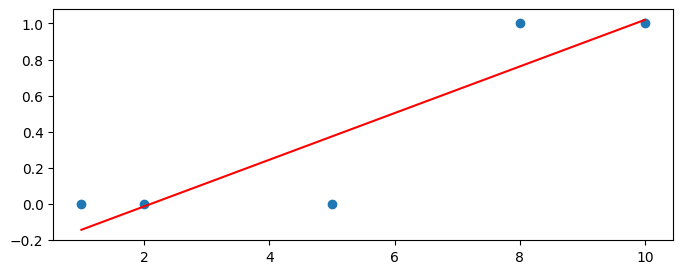

In [94]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

x= np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1]) #실제값

lm = stats.linregress(x,y) #기울기(weight, slope) 와 절편(bias, intercept)
lm[0], lm[1] #W와 bias

H = lm[0] * x + lm[1] #예측값
plt.scatter(x,y)
plt.plot(x,H,'r')
plt.show()

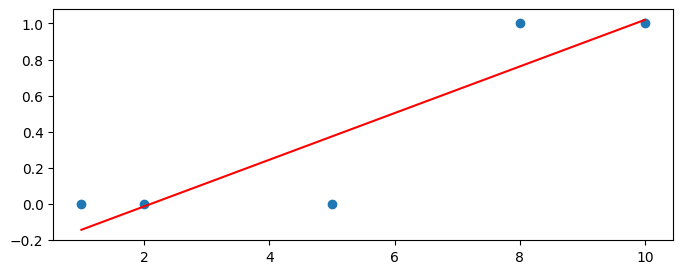

In [96]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

x= np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1]) #실제값

lm = stats.linregress(x,y) #기울기(weight, slope) 와 절편(bias, intercept)
lm[0], lm[1] #W와 bias

H = lm[0] * x + lm[1] #예측값
plt.scatter(x,y)
plt.plot(x,H,'r')
plt.show()

In [109]:
# 교안 46p
x_data = np.array([[10, 0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],[1], [1], [1], [0], [0], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립(입력)변수 2개 -> 타겟(출력)변수 1개인 weight & bias
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b # X@W +b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
# cost
# cost = tf.reduce_mean(tf.square(H - y))
# sigmoid 활성화함수를 입히면 위와 같은 cost 작아져 gradient 엄청 작아져
# 학습이 제대로 진행 안 됨 그래서 loss fucntion을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                     y:y_data})
    if step%100==1:
        print("{}번째 cost : {}".format(step, cost_val))
print("최종 cost : ", cost_val)

1번째 cost : 1.2939603328704834
101번째 cost : 0.39868244528770447
201번째 cost : 0.3232482373714447
301번째 cost : 0.2835887372493744
401번째 cost : 0.2587341368198395
501번째 cost : 0.24125537276268005
601번째 cost : 0.22796961665153503
701번째 cost : 0.21730709075927734
801번째 cost : 0.20840738713741302
901번째 cost : 0.20075881481170654
1001번째 cost : 0.19403798878192902
1101번째 cost : 0.18802949786186218
1201번째 cost : 0.18258404731750488
1301번째 cost : 0.17759473621845245
1401번째 cost : 0.17298270761966705
1501번째 cost : 0.16868837177753448
1601번째 cost : 0.1646658033132553
1701번째 cost : 0.16087886691093445
1801번째 cost : 0.15729869902133942
1901번째 cost : 0.1539018303155899
2001번째 cost : 0.15066900849342346
2101번째 cost : 0.14758430421352386
2201번째 cost : 0.1446341723203659
2301번째 cost : 0.1418072134256363
2401번째 cost : 0.1390935778617859
2501번째 cost : 0.13648471236228943
2601번째 cost : 0.13397322595119476
2701번째 cost : 0.1315525621175766
2801번째 cost : 0.12921692430973053
2901번째 cost : 0.12696117162704468
30

In [122]:
#accuracy( 정확도)  : 얼마나 맞았는지 %
predict = tf.cast(H>=0.5, dtype=tf.float32)
#sess.run(predict,feed_dict={X:x_data})
correct = tf.equal(predict,y)
#sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 : ', sess.run(accuracy, feed_dict={X:x_data,
                                                 y:y_data})*100,'%')

모델의 정확도 :  100.0 %


# XOR

In [129]:
#data set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])

# X & y
X = tf.placeholder (shape = [None,2], dtype=tf.float32)
y = tf.placeholder (shape = [None,1], dtype=tf.float32)

#입력 2개 => 출력 1개 W & b

W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis
logits = tf.matmul(X, W) + b # X@W +b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
# cost
# cost = tf.reduce_mean(tf.square(H - y))
# sigmoid 활성화함수를 입히면 위와 같은 cost 작아져 gradient 엄청 작아져
# 학습이 제대로 진행 안 됨 그래서 loss fucntion을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                     y:y_data})
    if step%100==1:
        print("{}번째 cost : {}".format(step, cost_val))
print("최종 cost : ", cost_val)

1번째 cost : 0.7733645439147949
101번째 cost : 0.703231930732727
201번째 cost : 0.6975598335266113
301번째 cost : 0.6951053142547607
401번째 cost : 0.694023609161377
501번째 cost : 0.6935418844223022
601번째 cost : 0.6933256387710571
701번째 cost : 0.6932281255722046
801번째 cost : 0.6931838989257812
901번째 cost : 0.6931639313697815
1001번째 cost : 0.6931547522544861
1101번째 cost : 0.6931506991386414
1201번째 cost : 0.6931487321853638
1301번째 cost : 0.6931478977203369
1401번째 cost : 0.6931475400924683
1501번째 cost : 0.6931473016738892
1601번째 cost : 0.6931472420692444
1701번째 cost : 0.6931471824645996
1801번째 cost : 0.6931471824645996
1901번째 cost : 0.6931471824645996
2001번째 cost : 0.6931471824645996
2101번째 cost : 0.6931471824645996
2201번째 cost : 0.6931471824645996
2301번째 cost : 0.6931471824645996
2401번째 cost : 0.6931471824645996
2501번째 cost : 0.6931471824645996
2601번째 cost : 0.6931471824645996
2701번째 cost : 0.6931471824645996
2801번째 cost : 0.6931471824645996
2901번째 cost : 0.6931471824645996
3001번째 cost : 0.69314718

24801번째 cost : 0.6931471824645996
24901번째 cost : 0.6931471824645996
25001번째 cost : 0.6931471824645996
25101번째 cost : 0.6931471824645996
25201번째 cost : 0.6931471824645996
25301번째 cost : 0.6931471824645996
25401번째 cost : 0.6931471824645996
25501번째 cost : 0.6931471824645996
25601번째 cost : 0.6931471824645996
25701번째 cost : 0.6931471824645996
25801번째 cost : 0.6931471824645996
25901번째 cost : 0.6931471824645996
26001번째 cost : 0.6931471824645996
26101번째 cost : 0.6931471824645996
26201번째 cost : 0.6931471824645996
26301번째 cost : 0.6931471824645996
26401번째 cost : 0.6931471824645996
26501번째 cost : 0.6931471824645996
26601번째 cost : 0.6931471824645996
26701번째 cost : 0.6931471824645996
26801번째 cost : 0.6931471824645996
26901번째 cost : 0.6931471824645996
27001번째 cost : 0.6931471824645996
27101번째 cost : 0.6931471824645996
27201번째 cost : 0.6931471824645996
27301번째 cost : 0.6931471824645996
27401번째 cost : 0.6931471824645996
27501번째 cost : 0.6931471824645996
27601번째 cost : 0.6931471824645996
27701번째 cost :

49001번째 cost : 0.6931471824645996
49101번째 cost : 0.6931471824645996
49201번째 cost : 0.6931471824645996
49301번째 cost : 0.6931471824645996
49401번째 cost : 0.6931471824645996
49501번째 cost : 0.6931471824645996
49601번째 cost : 0.6931471824645996
49701번째 cost : 0.6931471824645996
49801번째 cost : 0.6931471824645996
49901번째 cost : 0.6931471824645996
50001번째 cost : 0.6931471824645996
50101번째 cost : 0.6931471824645996
50201번째 cost : 0.6931471824645996
50301번째 cost : 0.6931471824645996
50401번째 cost : 0.6931471824645996
50501번째 cost : 0.6931471824645996
50601번째 cost : 0.6931471824645996
50701번째 cost : 0.6931471824645996
50801번째 cost : 0.6931471824645996
50901번째 cost : 0.6931471824645996
51001번째 cost : 0.6931471824645996
51101번째 cost : 0.6931471824645996
51201번째 cost : 0.6931471824645996
51301번째 cost : 0.6931471824645996
51401번째 cost : 0.6931471824645996
51501번째 cost : 0.6931471824645996
51601번째 cost : 0.6931471824645996
51701번째 cost : 0.6931471824645996
51801번째 cost : 0.6931471824645996
51901번째 cost :

In [130]:
#accuracy( 정확도)  : 얼마나 맞았는지 %
predict = tf.cast(H>=0.5, dtype=tf.float32)
#sess.run(predict,feed_dict={X:x_data})
correct = tf.equal(predict,y)
#sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 : ', sess.run(accuracy, feed_dict={X:x_data,
                                                 y:y_data})*100,'%')

모델의 정확도 :  75.0 %


# Deep Learning : XOR
 - X2 => 4 => i

In [135]:
#data set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])

# X & y
X = tf.placeholder (shape = [None,2], dtype=tf.float32)
y = tf.placeholder (shape = [None,1], dtype=tf.float32)

# layer1 : 입력2 => 출력4인 W & b
W1 = tf.Variable(tf.random_normal([2,4]))
b1 = tf.Variable(tf.random_normal([4]))

layer1 = tf.nn.relu(tf.matmul(X,W1) +b1)

# layer 2 : 입력4 => 출력1 W & b
W2 = tf.Variable(tf.random_normal([4,1]))
b2 = tf.Variable(tf.random_normal([1]))

#hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%1000==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:0.7137982845306396
1001번째 cost:0.4938623309135437
2001번째 cost:0.4360981583595276
3001번째 cost:0.4002704322338104
4001번째 cost:0.379280686378479
5001번째 cost:0.3679317533969879
6001번째 cost:0.3615766763687134
7001번째 cost:0.35777074098587036
8001번째 cost:0.35536640882492065
9001번째 cost:0.35370713472366333
최종 cost : 0.3525148


In [137]:

# accuracy ( 정확도 : 얼마나 맞췄는지 % )
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data,
                                                      y:y_data})*100, '%')

모델의 정확도 : 75.0 %


## layer 층을 X2 = 10 =>20=>10=>y1
                    입력층    hidden layer  출력층 

In [140]:
# layer1 : 입력2 => 출력10인 W & b
W1 = tf.Variable(tf.random_normal([2,10]))
b1 = tf.Variable(tf.random_normal([10]))

layer1 = tf.nn.relu(tf.matmul(X,W1) +b1)

# layer 2 : 입력10 => 출력20 W & b
W2 = tf.Variable(tf.random_normal([10,20]))
b2 = tf.Variable(tf.random_normal([20]))

layer2 = tf.nn.relu(tf.matmul(layer1,W2) +b2)

# layer 3: 입력20 => 출력10 W & b
W3 = tf.Variable(tf.random_normal([20,10]))
b3 = tf.Variable(tf.random_normal([10]))

layer3 = tf.nn.relu(tf.matmul(layer2,W3) +b3)

# layer 4 : 입력10 => 출력1 W & b
W4 = tf.Variable(tf.random_normal([10,1]))
b4 = tf.Variable(tf.random_normal([1]))

layer4 = tf.nn.relu(tf.matmul(layer1,W2) +b2)

#hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 401):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%10==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:4.532403469085693
11번째 cost:0.676638662815094
21번째 cost:0.3716764450073242
31번째 cost:0.28709638118743896
41번째 cost:0.22984811663627625
51번째 cost:0.1950279176235199
61번째 cost:0.16967971622943878
71번째 cost:0.14961954951286316
81번째 cost:0.13392435014247894
91번째 cost:0.12113960087299347
101번째 cost:0.11072392761707306
111번째 cost:0.10245656967163086
121번째 cost:0.09452296048402786
131번째 cost:0.08791445195674896
141번째 cost:0.08183666318655014
151번째 cost:0.07738032937049866
161번째 cost:0.0728531926870346
171번째 cost:0.06897103786468506
181번째 cost:0.0652519166469574
191번째 cost:0.062062982469797134
201번째 cost:0.05932844802737236
211번째 cost:0.056838080286979675
221번째 cost:0.054533299058675766
231번째 cost:0.05230739712715149
241번째 cost:0.05023418739438057
251번째 cost:0.04834719002246857
261번째 cost:0.046542420983314514
271번째 cost:0.044870488345623016
281번째 cost:0.04325180873274803
291번째 cost:0.04159106686711311
301번째 cost:0.04003265127539635
311번째 cost:0.038711369037628174
321번째 cost:0.03749566

In [142]:
# accuracy ( 정확도 : 얼마나 맞췄는지 % )
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data,
                                                      y:y_data})*100, '%')

모델의 정확도 : 100.0 %


In [143]:
#예측
sess.run(H,feed_dict={X: np.array([[0,0]])})

array([[0.02831308]], dtype=float32)